<a href="https://colab.research.google.com/github/Park-hanna/BDA_study/blob/main/Data%20Visualization/Suicide_Rates_Overview_1985_to_2016___visual_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parkhannah833","key":"78bf44606c362ad274d8621ef9b609e9"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions list

ref                                                                                           deadline             category             reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/vesuvius-challenge-ink-detection                          2023-06-14 23:59:00  Featured         $1,000,000        925           False  
https://www.kaggle.com/competitions/asl-fingerspelling                                        2023-08-10 23:59:00  Research           $200,000          0           False  
https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction                 2023-06-08 23:59:00  Research           $100,000        960           False  
https://www.kaggle.com/competitions/2023-kaggle-ai-report                                     2023-07-05 23:59:00  Analytics           $70,0

In [ ]:
!kaggle datasets download -d russellyates88/suicide-rates-overview-1985-to-2016

  0% 0.00/397k [00:00<?, ?B/s]
100% 397k/397k [00:00<00:00, 113MB/s]


In [ ]:
!unzip suicide-rates-overview-1985-to-2016.zip

Archive:  suicide-rates-overview-1985-to-2016.zip
  inflating: master.csv              


In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
data = pd.read_csv('/content/master.csv')
data = data.drop(['country-year', 'HDI for year'], axis = 1)
print(data.shape)
data.head()

(27820, 10)


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [ ]:
data[['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']].describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


you can see map with missing countries in this dataset. this is important information, and we can suggest that situation with suicide in these countries is bad. it should be noted thad our dataset is offset and not completely objective

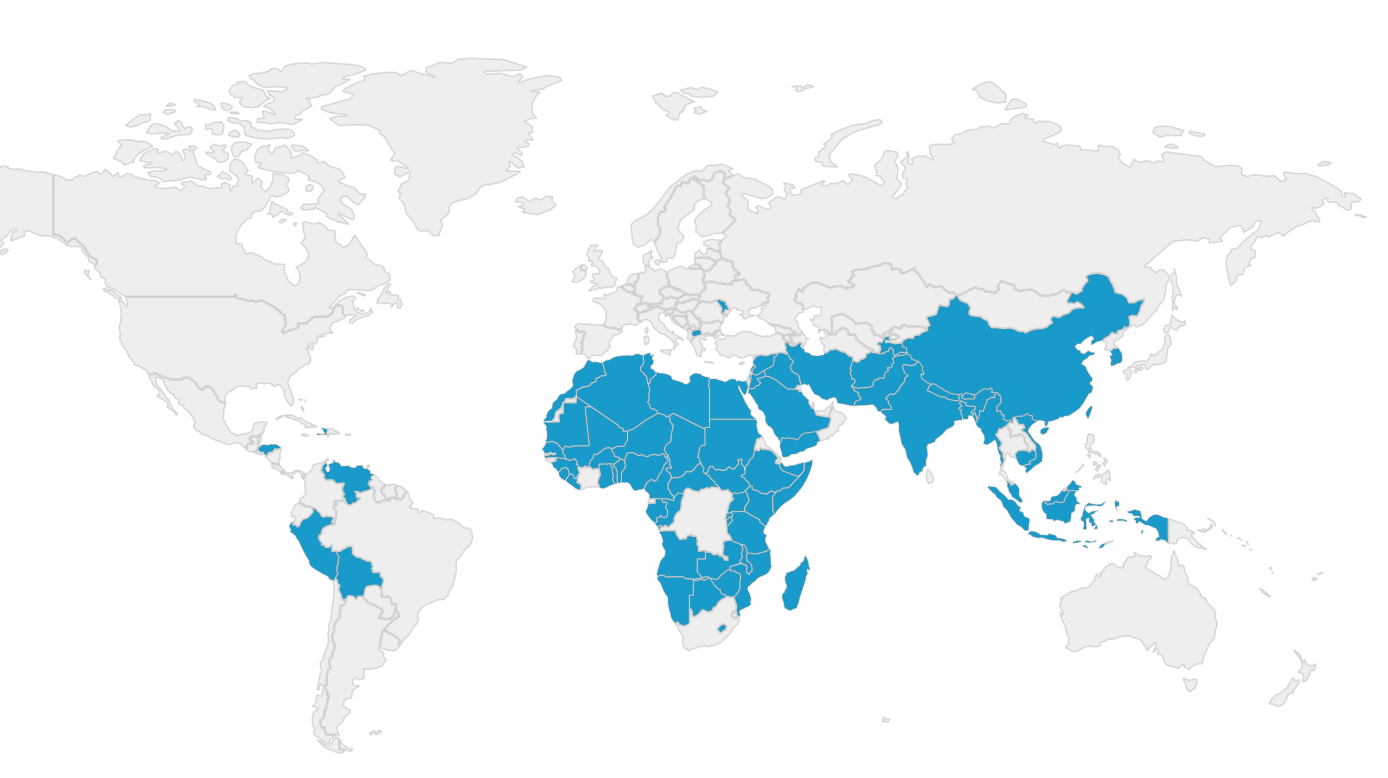

In [ ]:
from IPython.display import Image
Image('/content/missed countries.png')

count of suicides for 31 years. note that not all countries are include in this list

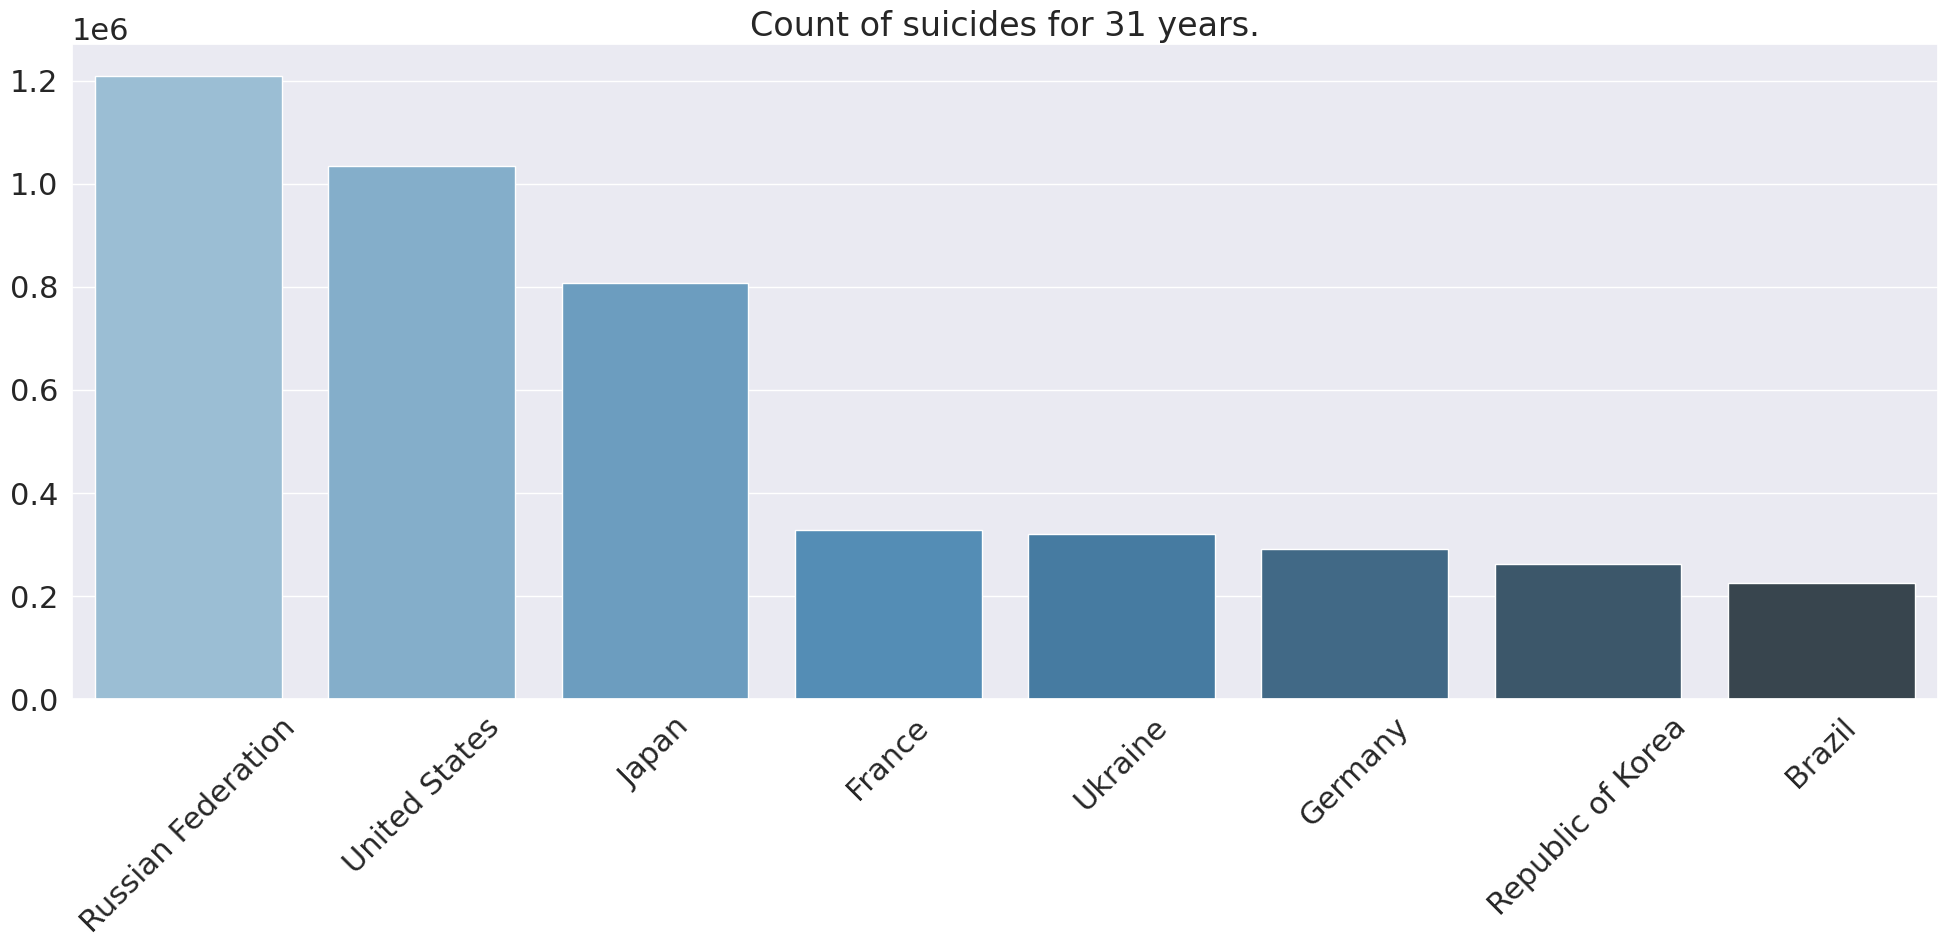

In [ ]:
suic_sum = pd.DataFrame(data['suicides_no'].groupby(data['country']).sum())
suic_sum = suic_sum.reset_index().sort_values(by = 'suicides_no', ascending = False)
most_cont = suic_sum.head(8)

fig = plt.figure(figsize = (20, 10))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale = 2)
sns.barplot(y = 'suicides_no', x = 'country', data= most_cont, palette  = 'Blues_d')
plt.xticks(rotation = 45)
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()

In [ ]:
!kaggle datasets download -d nikitagrec/world-capitals-gps

  0% 0.00/5.87k [00:00<?, ?B/s]
100% 5.87k/5.87k [00:00<00:00, 16.2MB/s]


In [ ]:
!unzip /content/world-capitals-gps.zip

Archive:  /content/world-capitals-gps.zip
  inflating: concap.csv              


In [ ]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 116.4 MB/s eta 0:00:00


In [ ]:
from mpl_toolkits.basemap import Basemap
concap = pd.read_csv('/content/concap.csv')
concap.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [ ]:
def reg(x):
  if x == 'Russia':
    res = 'Russian Federation'
  else:
    res = x
  return res

concap['CountryName'] = concap['CountryName'].apply(reg)

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']], \
                     suic_sum, left_on = 'CountryName', right_on = 'country')

consider it on the map. remind you, that many big=by population countries aren't included in this dataset

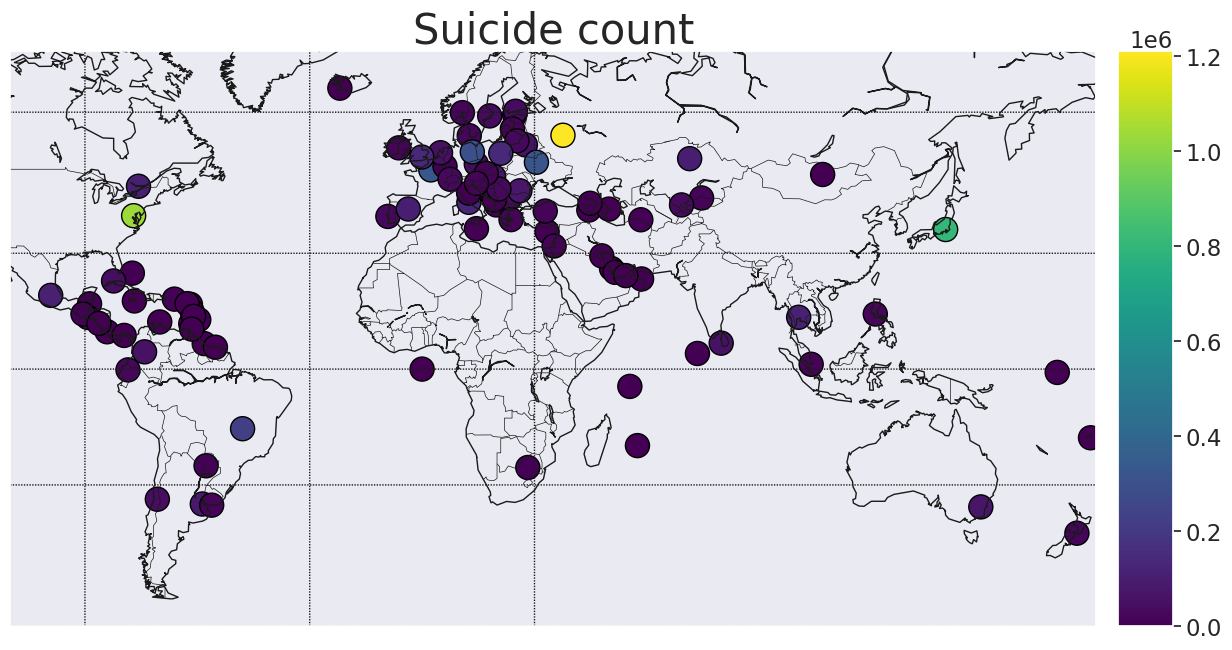

In [ ]:
def mapWorld(col1 ,size2 , title3, label4, metr = 100, colmap = 'hot'):
  m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=70, llcrnrlon=-110, urcrnrlon=180, resolution='c')
  m.drawcoastlines()
  m.drawcountries()
  m.drawparallels(np.arange(-90, 91., 30.))
  m.drawmeridians(np.arange(-90, 90., 60.))
  lat = data_full['CapitalLatitude'].values
  lon = data_full['CapitalLongitude'].values
  a_1 = data_full[col1].values
  if size2:
    a_2 = data_full[size2].values
  else:
    a_2 = 1
  m.scatter(lon, lat, latlon=True, c=a_1, s=metr*a_2, linewidth=1, edgecolors='black', cmap=colmap, alpha=1)
  cbar = m.colorbar()
  cbar.set_label(label4, fontsize = 30)
  plt.title(title3, fontsize = 30)
  plt.show()

sns.set(font_scale = 1.5)
plt.figure(figsize= (15,15))
mapWorld(col1 = 'suicides_no', size2=False, title3='Suicide count', label4='', metr=300, colmap='viridis')

compare it with map - gdp_per_capita($)

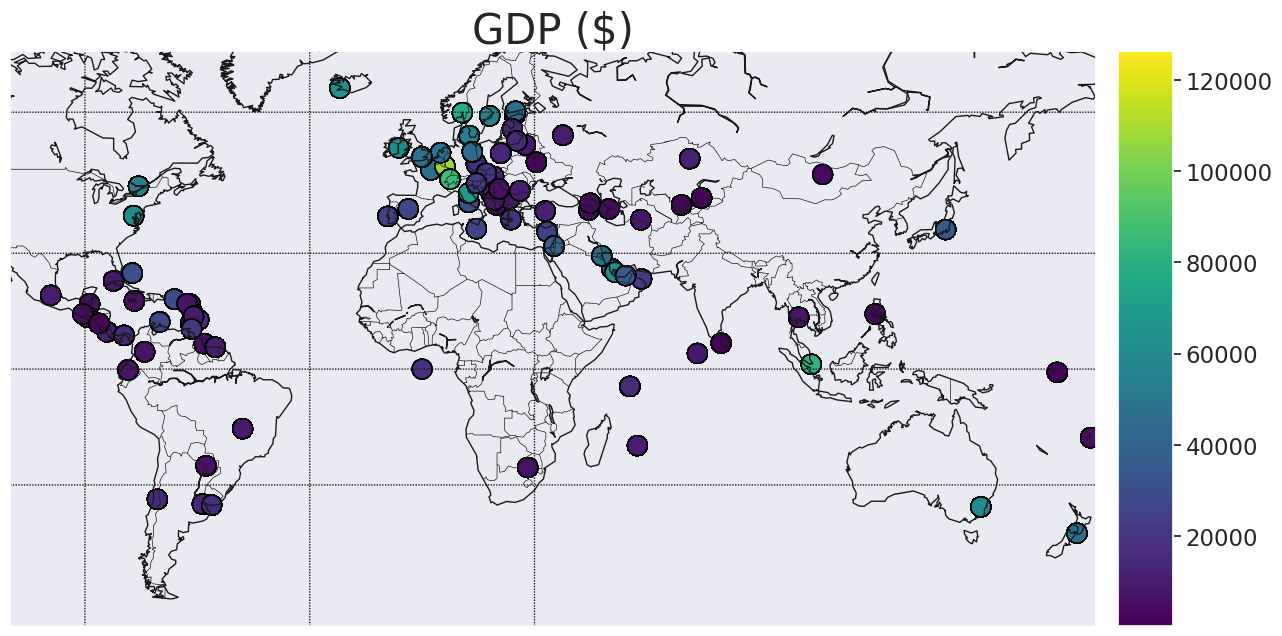

In [ ]:
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
                     data, left_on = 'CountryName', right_on = 'country')
plt.figure(figsize=(15,15))
mapWorld(col1 = 'gdp_per_capita ($)', size2= False, title3 = 'GDP ($)', label4= '', metr=200, colmap='viridis')

consider same barplot with gender difference

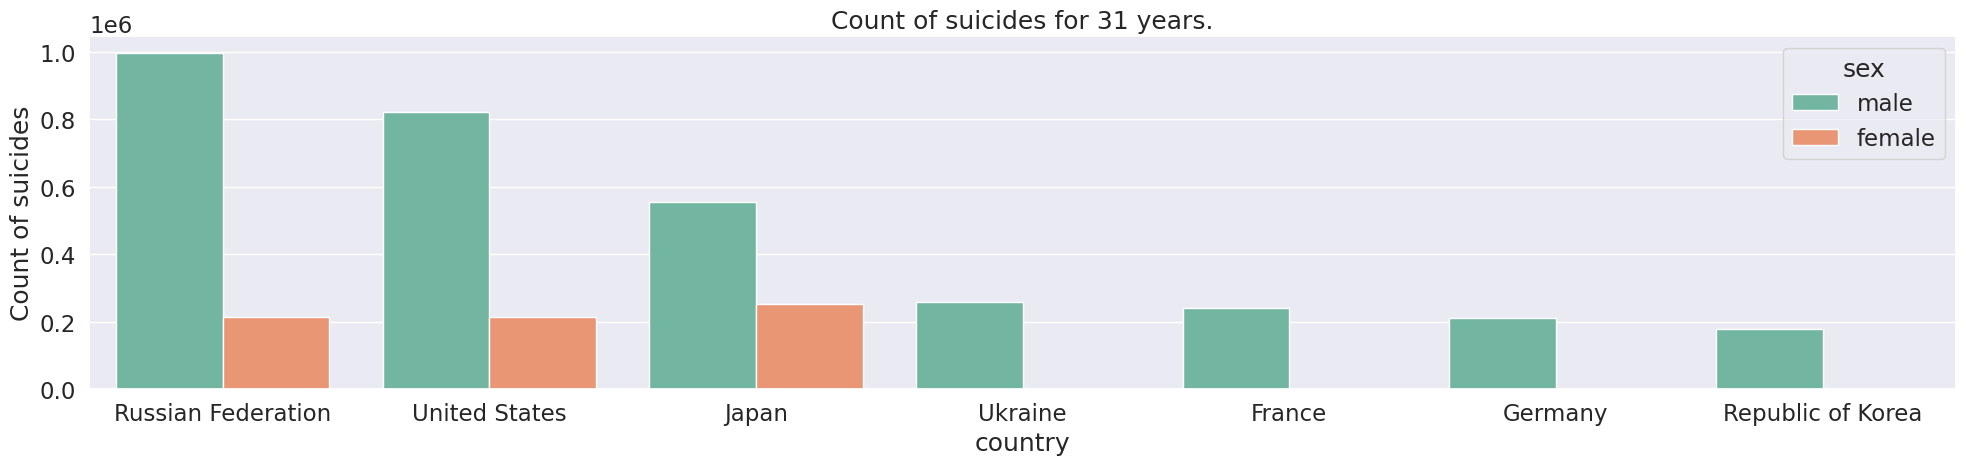

In [ ]:
suic_sum_m = data['suicides_no'].groupby([data['country'], data['sex']]).sum()
suic_sum_m = suic_sum_m.reset_index().sort_values(by='suicides_no', ascending=False)
most_cont_m = suic_sum_m.head(10)

fig = plt.figure(figsize=(20,5))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale = 1.5)
sns.barplot(y = 'suicides_no', x='country', hue = 'sex', data=most_cont_m, palette = 'Set2')
plt.ylabel('Count of suicides')
plt.tight_layout()

Compare this with statistics - suicides / 100k pop

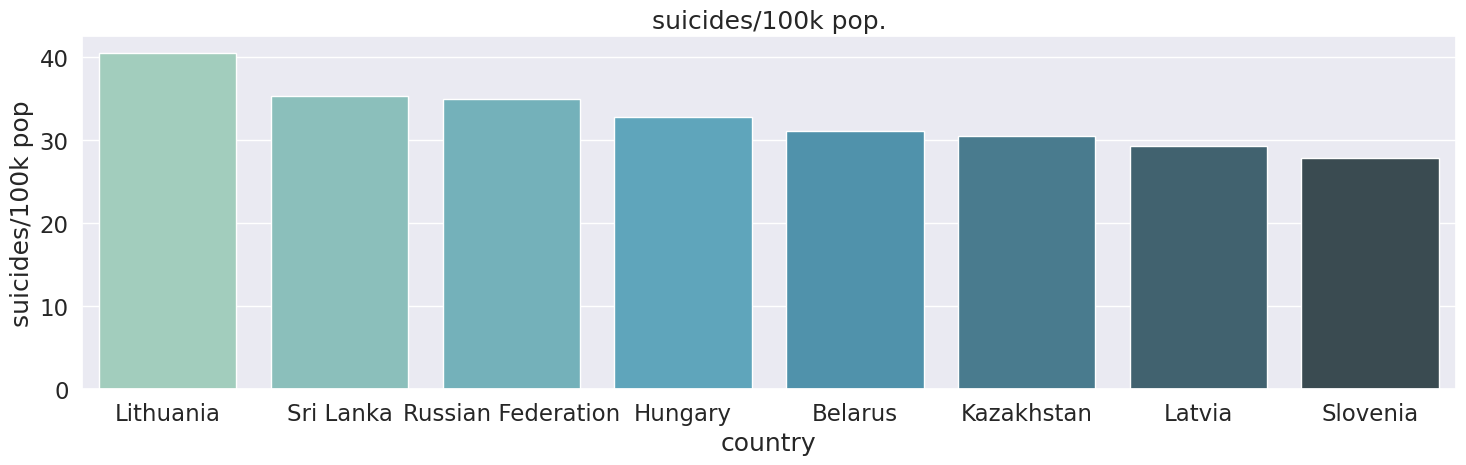

In [ ]:
suic_mean = pd.DataFrame(data['suicides/100k pop'].groupby(data['country']).mean())
suic_mean = suic_mean.reset_index()
suic_mean_most = suic_mean.sort_values(by='suicides/100k pop', ascending = False).head(8)

fig = plt.figure(figsize = (15,5))
plt.title('suicides/100k pop.')
sns.set(font_scale=1.5)
sns.barplot(y='suicides/100k pop', x ='country', data=suic_mean_most, palette='GnBu_d')
plt.ylabel('suicides/100k pop')
plt.tight_layout()

divide data into old and new

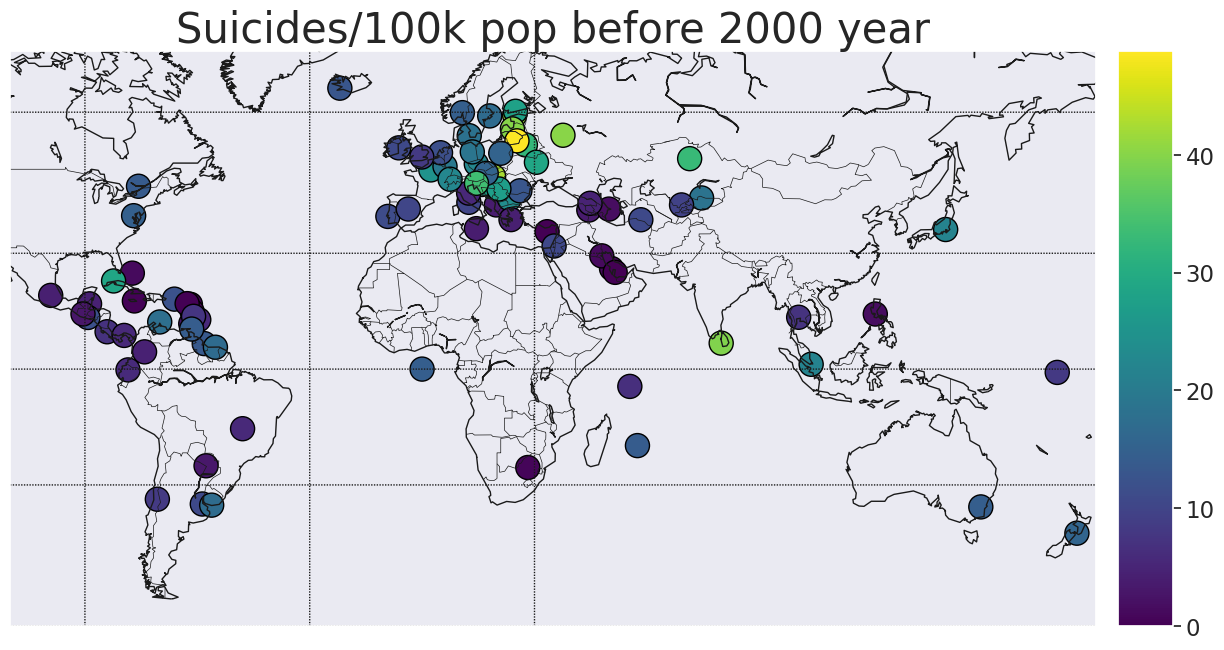

In [ ]:
data_past = data[data['year']<2000]
suic_mean = pd.DataFrame(data_past['suicides/100k pop'].groupby(data_past['country']).mean())
suic_mean = suic_mean.reset_index()
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
                     suic_mean, left_on = 'CountryName', right_on='country')
plt.figure(figsize = (15,15))
mapWorld(col1 = 'suicides/100k pop', size2=False, title3='Suicides/100k pop before 2000 year', label4 = '', metr=300, colmap='viridis')

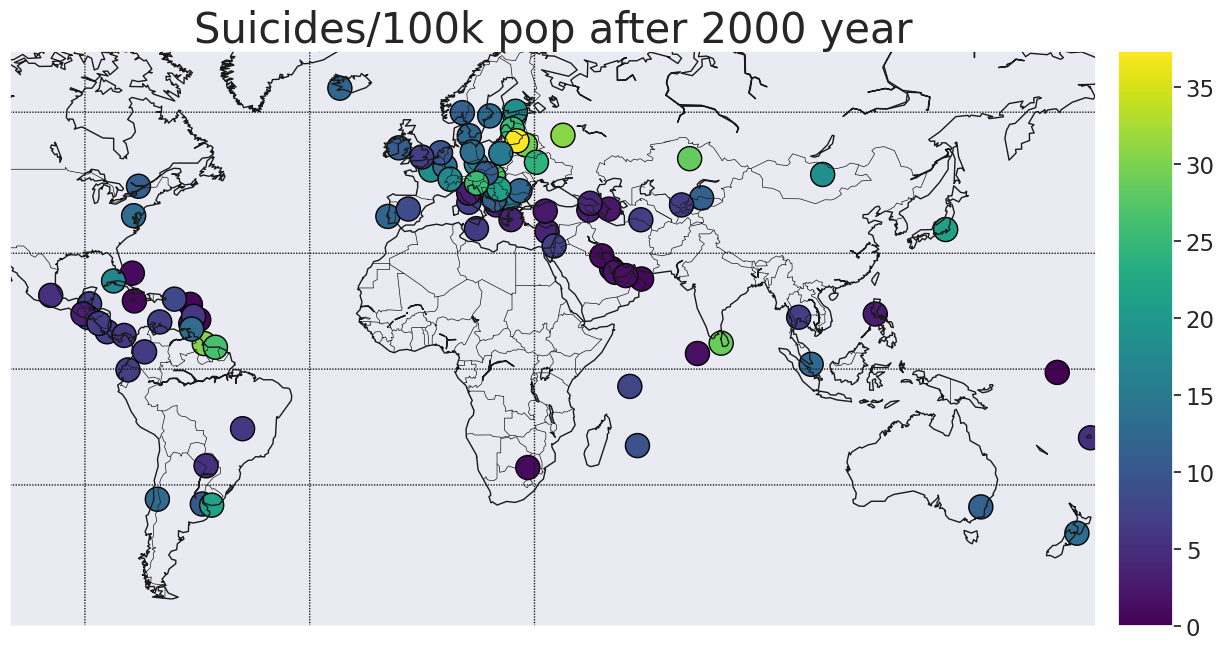

In [ ]:
data_last = data[data['year'] > 2000]
suic_mean = pd.DataFrame(data_last['suicides/100k pop'].groupby(data_last['country']).mean())
suic_mean = suic_mean.reset_index()
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
                     suic_mean, left_on = 'CountryName', right_on='country')

plt.figure(figsize=(15,15))
mapWorld(col1='suicides/100k pop', size2=False, title3 = 'Suicides/100k pop after 2000 year', label4='', metr=300, colmap='viridis')

we can see count of suicides by year distribution

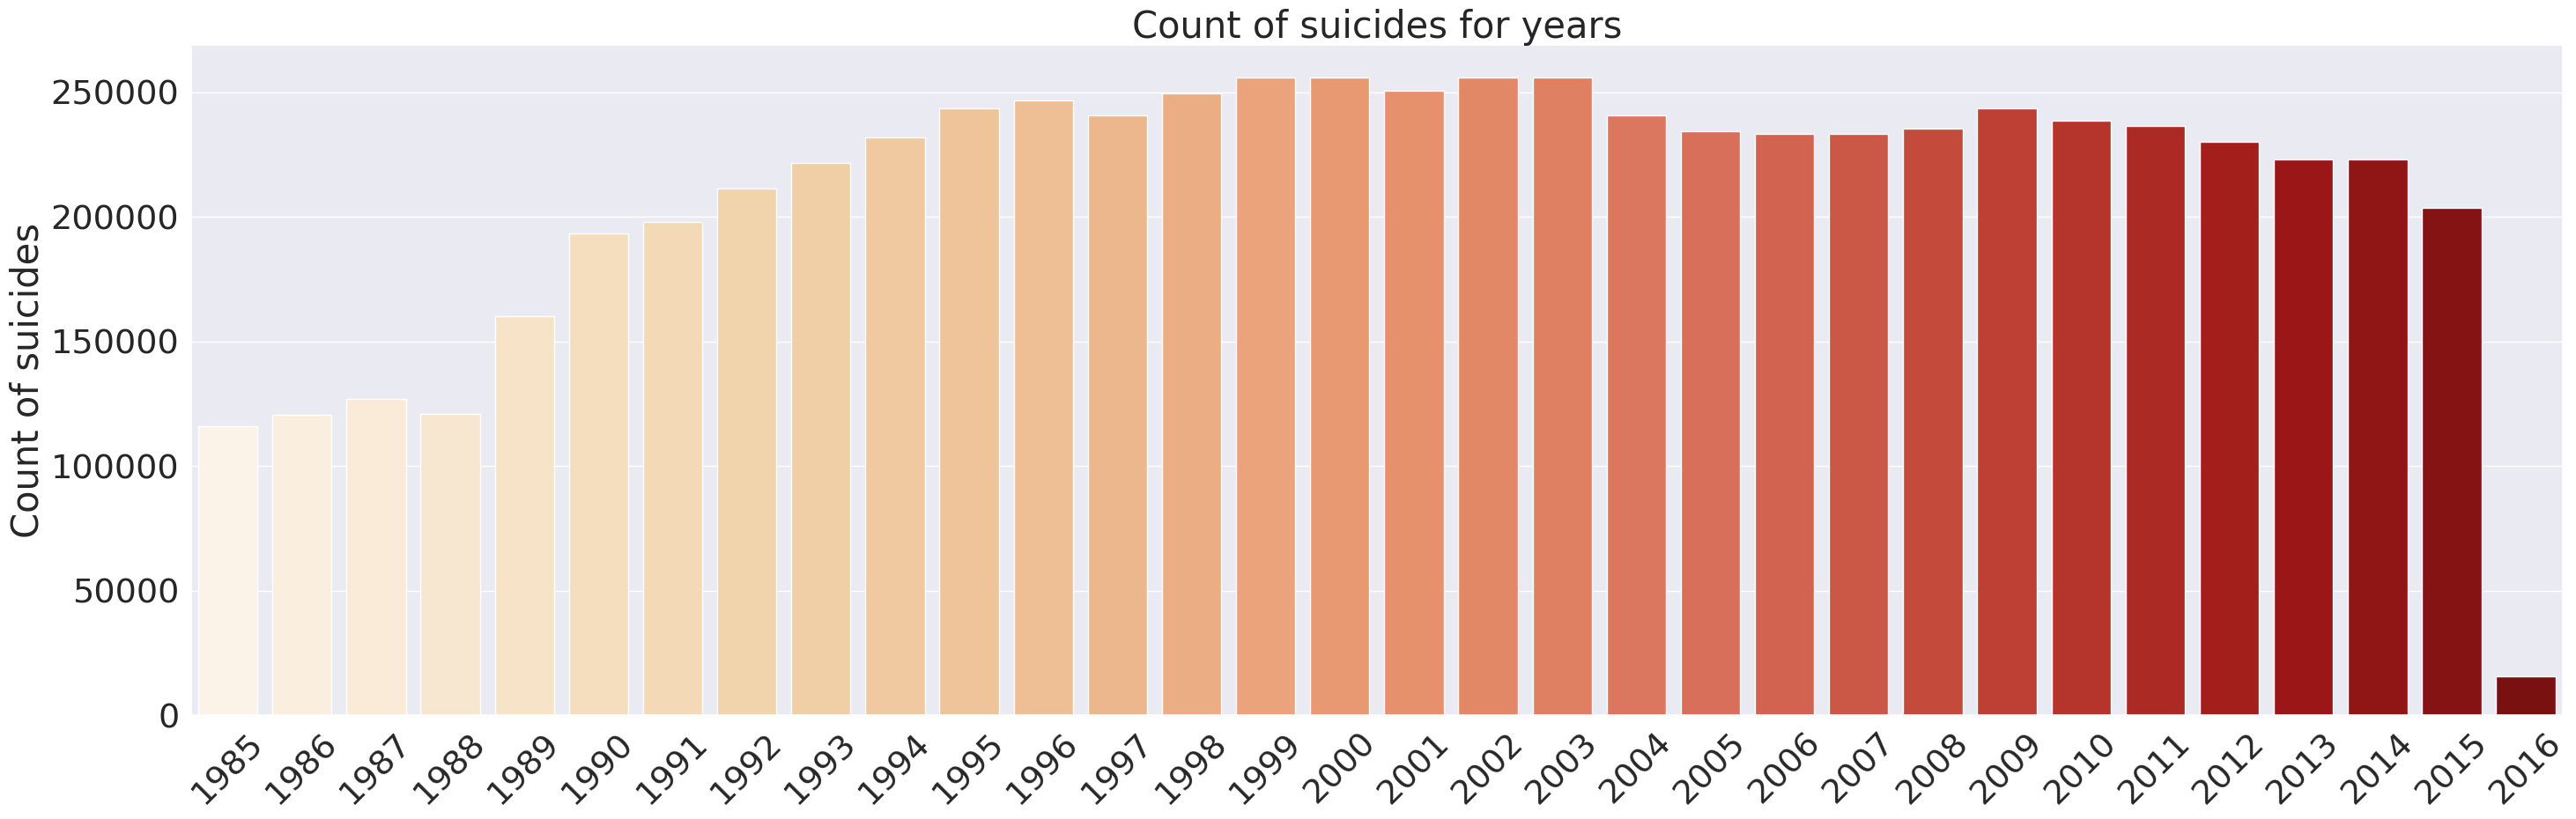

In [ ]:
suic_sum_yr = pd.DataFrame(data['suicides_no'].groupby(data['year']).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_values(by='suicides_no', ascending=False)
most_cont_yr = suic_sum_yr

fig = plt.figure(figsize=(30,10))
plt.title('Count of suicides for years')
sns.set(font_scale=2.5)
sns.barplot(y='suicides_no', x='year', data=most_cont_yr, palette='OrRd')
plt.ylabel('Count of suicides')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()

most critical age group

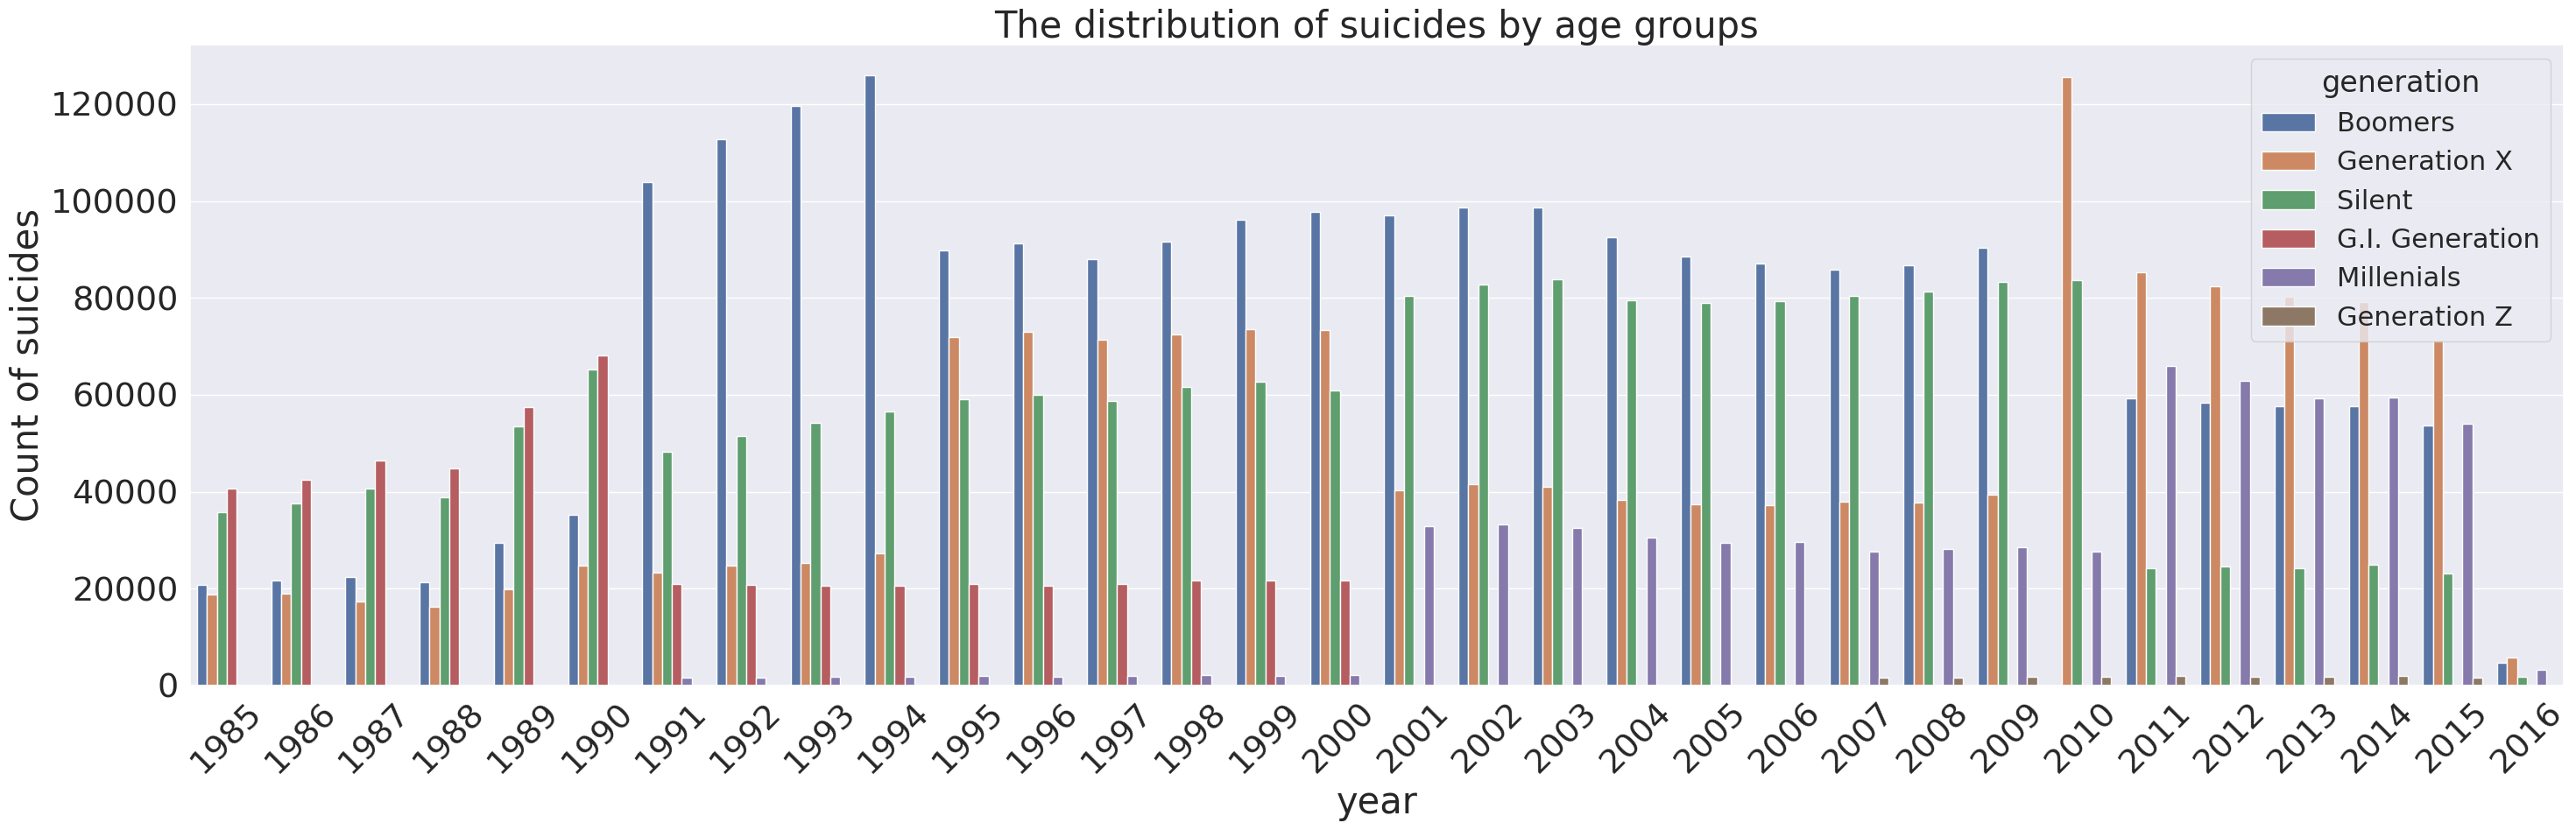

In [ ]:
suic_sum_yr = pd.DataFrame(data['suicides_no'].groupby([data['generation'], data['year']]).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_values(by = 'suicides_no', ascending=False)
most_cont_yr = suic_sum_yr

fig = plt.figure(figsize=(30,10))
plt.title('The distribution of suicides by age groups')

sns.set(font_scale= 2)
sns.barplot(y = 'suicides_no', x='year', hue='generation', data=most_cont_yr, palette='deep')
plt.ylabel('Count of suicides')
plt.xticks(rotation = 45)
plt.tight_layout()

In [ ]:
suic_sum_yr = pd.DataFrame(data['suicides_no'].groupby([data['generation'], data['country']]).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_values(by = 'suicides_no', ascending=False)
most_cont = suic_sum_yr

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
                     most_cont, left_on = 'CountryName', right_on='country')

for this map, color = generation, size - suicides_no

 Generation x:100 
 Silent:200 
 G.I. Generation:300 
 Boomers:400 
 Millenials:500 
 Generationz:600


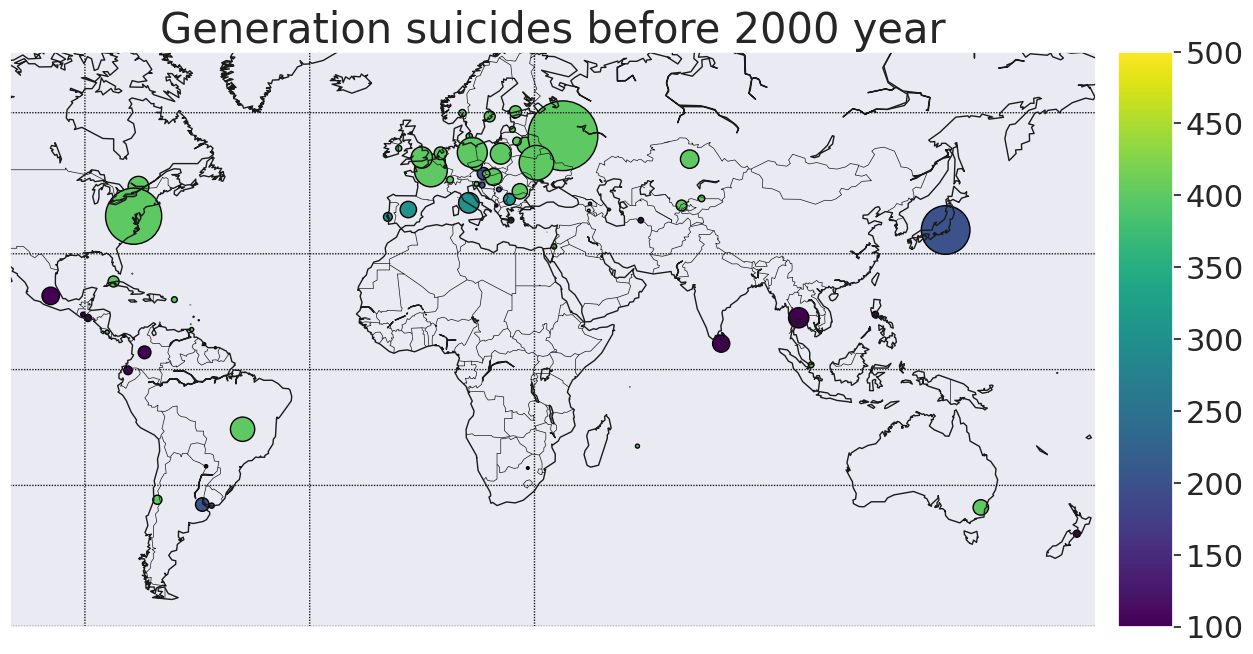

In [ ]:
data_new = data[data['year'] < 2000]
title_map = 'Generation suicides before 2000 year'
data_gener = pd.DataFrame(data_new['suicides_no'].groupby([data_new['generation'], data_new['country']]).sum()).reset_index()
age_max = pd.DataFrame(data_gener['suicides_no'].groupby(data_gener['country']).max()).reset_index()
gen_full = pd.merge(age_max, data_gener, left_on=['suicides_no', 'country'], right_on=['suicides_no', 'country'])

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
                     gen_full, left_on = 'CountryName', right_on='country')
data_full.dropna(inplace=True)

def gener(x):
  dic_t = {'Generation X':100, 'Silent':200, 'G.I. Generation' : 300, 'Boomers':400, 'Millenials':500, 'Generationz':600}
  return dic_t[x]

data_full.generation = data_full.generation.apply(gener)
print(' Generation x:100 \n Silent:200 \n G.I. Generation:300 \n Boomers:400 \n Millenials:500 \n Generationz:600')

plt.figure(figsize=(15,15))
mapWorld(col1='generation', size2='suicides_no', title3=title_map, label4='', metr=0.01, colmap='viridis')

 Generation x:100 
 Silent:200 
 G.I. Generation:300 
 Boomers:400 
 Millenials:500 
 Generationz:600


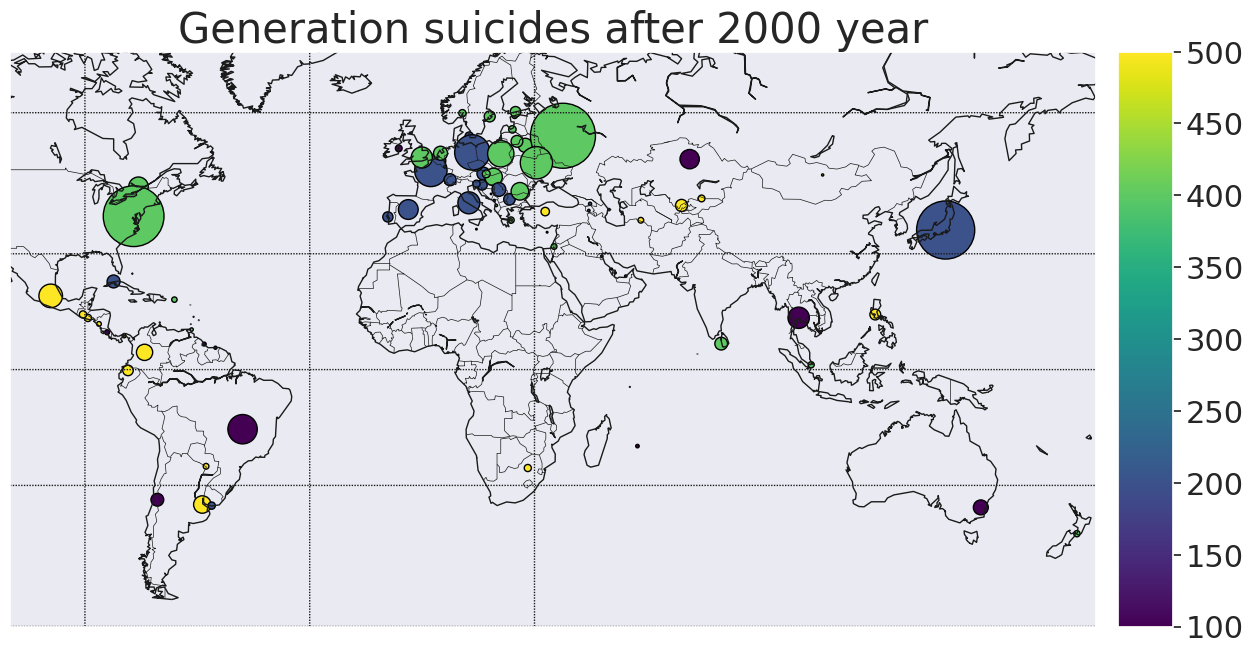

In [ ]:
data_new = data[data['year'] >= 2000]
title_map = 'Generation suicides after 2000 year'
data_gener = pd.DataFrame(data_new['suicides_no'].groupby([data_new['generation'], data_new['country']]).sum()).reset_index()
age_max = pd.DataFrame(data_gener['suicides_no'].groupby(data_gener['country']).max()).reset_index()
gen_full = pd.merge(age_max, data_gener, left_on=['suicides_no', 'country'], right_on=['suicides_no', 'country'])

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
                     gen_full, left_on = 'CountryName', right_on='country')
data_full.dropna(inplace=True)

def gener(x):
  dic_t = {'Generation X':100, 'Silent':200, 'G.I. Generation' : 300, 'Boomers':400, 'Millenials':500, 'Generationz':600}
  return dic_t[x]

data_full.generation = data_full.generation.apply(gener)
print(' Generation x:100 \n Silent:200 \n G.I. Generation:300 \n Boomers:400 \n Millenials:500 \n Generationz:600')

plt.figure(figsize=(15,15))
mapWorld(col1='generation', size2='suicides_no', title3=title_map, label4='', metr=0.01, colmap='viridis')